# 题目

给你一个字符串 s，找到 s 中最长的回文子串。

如果字符串的反序与原始字符串相同，则该字符串称为回文字符串。

# 算法思想

<font color=red size=5> 核心：递归，动态规划 </font>    
步骤：   

对于一个子串而言，如果它是回文串，并且长度大于 222，那么将它首尾的两个字母去除之后，它仍然是个回文串。例如对于字符串 “ababa”，如果我们已经知道 “bab” 是回文串，那么 “ababa” 一定是回文串，这是因为它的首尾两个字母都“a”。

根据这样的思路，我们就可以用动态规划的方法解决本题。我们用 P(i,j) 表示字符串 s 的第 i 到 j 个字母组成的串（下文表示成 s[i:j]）是否为回文串：

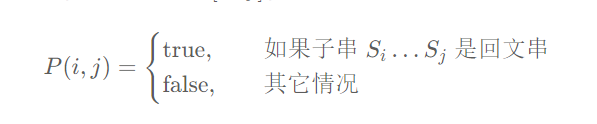
 
这里的「其它情况」包含两种可能性：

- s[i,j] 本身不是一个回文串；

- i>ji > ，此时 s[i,j] 本身不合法。

那么我们就可以写出动态规划的状态转移方程：

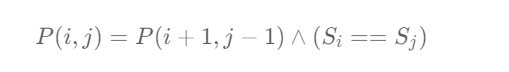

也就是说，只有 s[i+1:j−1] 是回文串，并且 s 的第 i 和 j 个字母相同时，s[i:j] 才会是回文串。

上文的所有讨论是建立在子串长度大于 2 的前提之上的，我们还需要考虑动态规划中的边界条件，即子串的长度为 1 或 222。对于长度为 1 的子串，它显然是个回文串；对于长度为 2 的子串，只要它的两个字母相同，它就是一个回文串。因此我们就可以写出动态规划的边界条件：

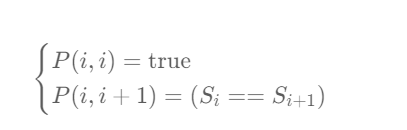

根据这个思路，我们就可以完成动态规划了，最终的答案即为所有 P(i,j)=trueP(i, j) = \text{true} 中 j−i+1（即子串长度）的最大值。注意：在状态转移方程中，我们是从长度较短的字符串向长度较长的字符串进行转移的，因此一定要注意动态规划的循环顺序。


# 代码实现

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        n = len(s)
        if n < 2:
            return s
        
        max_len = 1
        begin = 0
        # dp[i][j] 表示 s[i..j] 是否是回文串
        dp = [[False] * n for _ in range(n)]
        for i in range(n):
            dp[i][i] = True
        
        # 递推开始
        # 先枚举子串长度
        for L in range(2, n + 1):
            # 枚举左边界，左边界的上限设置可以宽松一些
            for i in range(n):
                # 由 L 和 i 可以确定右边界，即 j - i + 1 = L 得
                j = L + i - 1
                # 如果右边界越界，就可以退出当前循环
                if j >= n:
                    break
                    
                if s[i] != s[j]:
                    dp[i][j] = False 
                else:
                    if j - i < 3:
                        dp[i][j] = True
                    else:
                        dp[i][j] = dp[i + 1][j - 1]
                
                # 只要 dp[i][L] == true 成立，就表示子串 s[i..L] 是回文，此时记录回文长度和起始位置
                if dp[i][j] and j - i + 1 > max_len:
                    max_len = j - i + 1
                    begin = i
        return s[begin:begin + max_len]

- 时间复杂度：$O（n^2)$   其中 n是字符串的长度。动态规划的状态总数为$O（n^2)$，对于每个状态，我们需要转移的时间为 $O(1)$。
- 空间复杂度：$O（n^2)$   即存储动态规划状态需要的空间。 